**Module 1: Introduction to Data Science**

**Lab Practice-1.1**

**Title:** Customer Purchasing Behavior Analysis for a Retail Company

**Problem Statement:** A retail company wants to understand customer purchasing behavior. You are tasked with performing an Exploratory Data Analysis (EDA) on their sales data. Identify key patterns and anomalies, clean and preprocess the data for further analysis.


**Step-by-Step Explanation**

1.	Import Libraries
  a.	pandas: For data manipulation and analysis.
  b.	numpy: For numerical operations.
  c.	matplotlib.pyplot and seaborn: For data visualization.

2.	Create a Detailed Sample Dataset
  a.	Set seed: Ensure reproducibility of random numbers.
  b.	Define categories: A list of product categories.
  c.	n_samples: Number of samples (rows) to generate.
  d.	data: Dictionary with randomly generated categories, discounted prices, and actual prices.

3.	Format Prices as Strings
  a.	Convert prices to strings: Add currency symbols and commas to prices for better readability.
4.	Calculate Discount Percentage
  a.	Calculate discounts: Compute the percentage discount for each item.
5.	Create DataFrame
  a.	Create DataFrame: Convert the dictionary to a pandas DataFrame.
6.	Display Initial Data
  a.	Display data: Print the first few rows, basic info, summary statistics, and check for missing values.
7.	Convert Price Columns to Numeric
  a.	Convert prices: Remove currency symbols and commas, and convert to float.
8.	Handle Missing Values
  a.	Fill missing values: Replace any missing values with the mean of the column.
9.	Handle Outliers
  a.	Remove outliers: Exclude rows where the discounted price is more than 3 standard deviations from the mean.
10.	Feature Engineering
   a.	Convert discount percentage: Remove the percent sign and convert to float.
11.	Exploratory Data Analysis (EDA)
   a.	Univariate Analysis
        i.	Plot the distribution of discounted prices.
   b.	Bivariate Analysis
        i.	Plot the relationship between actual and discounted prices.
   c.	 Correlation Matrix
        i.	Display the correlation matrix.
   d.	Group by Category
        i.	Group data by category and plot the average discounted price.
12.	Save Cleaned Data
   a.	Save data: Write the cleaned DataFrame to a CSV file.


**Step 1:Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:Create a more detailed sample dataset**

In [2]:
np.random.seed(42)
categories = ['Electronics', 'Clothing', 'Furniture', 'Toys', 'Books', 'Groceries', 'Beauty', 'Sports', 'Automotive', 'Home Decor']
n_samples = 500

data = {
    'category': np.random.choice(categories, n_samples),
    'discounted_price': np.random.randint(50, 10000, n_samples),
    'actual_price': np.random.randint(100, 15000, n_samples)
}

**Step 3:Convert prices to strings with currency symbols and commas**

In [3]:
data['discounted_price_str'] = ['₹{:,}'.format(val) for val in data['discounted_price']]
data['actual_price_str'] = ['₹{:,}'.format(val) for val in data['actual_price']]

**Step 4: Calculate discount percentage**

In [4]:
data['discount_percentage'] = [
    f"{(1 - discounted/actual)*100:.2f}%" if actual > discounted else "0%"
    for discounted, actual in zip(data['discounted_price'], data['actual_price'])
]

**Step 5: Create DataFrame**

In [5]:
sales_data = pd.DataFrame(data)

**Step 6:Display the first few rows of the dataset**

In [6]:
print(sales_data.head())

  category  discounted_price  actual_price discounted_price_str  \
0   Beauty              5018          3277               ₹5,018   
1     Toys              5967         11348               ₹5,967   
2   Sports              8837          8895               ₹8,837   
3    Books               778         11741                 ₹778   
4   Beauty              1415          6124               ₹1,415   

  actual_price_str discount_percentage  
0           ₹3,277                  0%  
1          ₹11,348              47.42%  
2           ₹8,895               0.65%  
3          ₹11,741              93.37%  
4           ₹6,124              76.89%  


**Step 7: Basic data information**

In [7]:
print(sales_data.info())
print(sales_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              500 non-null    object
 1   discounted_price      500 non-null    int64 
 2   actual_price          500 non-null    int64 
 3   discounted_price_str  500 non-null    object
 4   actual_price_str      500 non-null    object
 5   discount_percentage   500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB
None
       discounted_price  actual_price
count        500.000000    500.000000
mean        4994.988000   7407.900000
std         2790.183152   4120.936956
min           55.000000    154.000000
25%         2598.000000   3799.500000
50%         5139.000000   7285.000000
75%         7253.750000  11348.250000
max         9995.000000  14911.000000


**Step 8: Check for missing values**

In [8]:
print(sales_data.isnull().sum())

category                0
discounted_price        0
actual_price            0
discounted_price_str    0
actual_price_str        0
discount_percentage     0
dtype: int64


**Step 9:Clean and preprocess the data**

In [9]:
# Convert price columns to numeric values by removing currency symbols and commas
sales_data['discounted_price'] = sales_data['discounted_price_str'].str.replace('₹', '').str.replace(',', '').astype(float)
sales_data['actual_price'] = sales_data['actual_price_str'].str.replace('₹', '').str.replace(',', '').astype(float)

# Handle missing values if any (example: fill with mean, median, or a specific value)
sales_data['discounted_price'].fillna(sales_data['discounted_price'].mean(), inplace=True)
sales_data['actual_price'].fillna(sales_data['actual_price'].mean(), inplace=True)

# Handle outliers
# Example: Remove rows where 'discounted_price' is outside 3 standard deviations
sales_data = sales_data[np.abs(sales_data['discounted_price'] - sales_data['discounted_price'].mean()) <= (3 * sales_data['discounted_price'].std())]

/tmp/ipykernel_840402/3738288169.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['discounted_price'].fillna(sales_data['discounted_price'].mean(), inplace=True)
/tmp/ipykernel_840402/3738288169.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

**Step 10: Feature engineering (example: creating new columns based on existing data)**

In [10]:
sales_data['discount_percentage'] = sales_data['discount_percentage'].str.replace('%', '').astype(float)

**Step 11:Exploratory Data Analysis (EDA)**

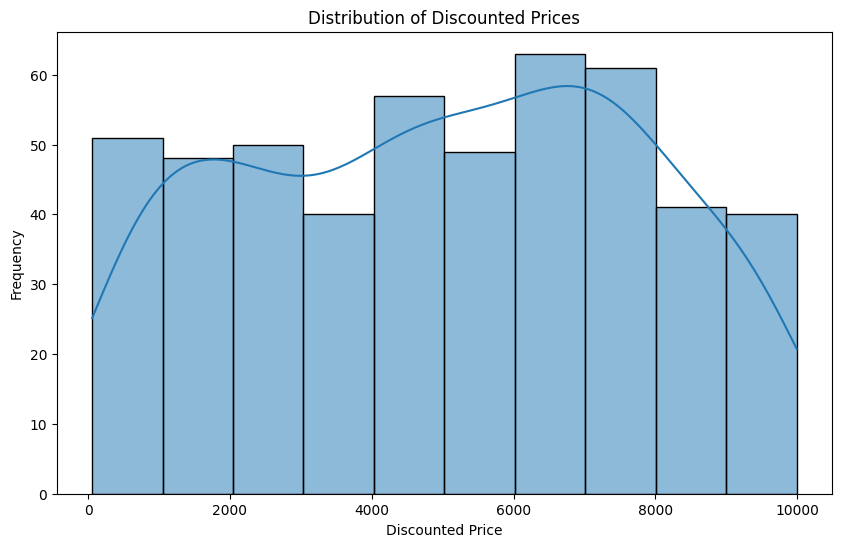

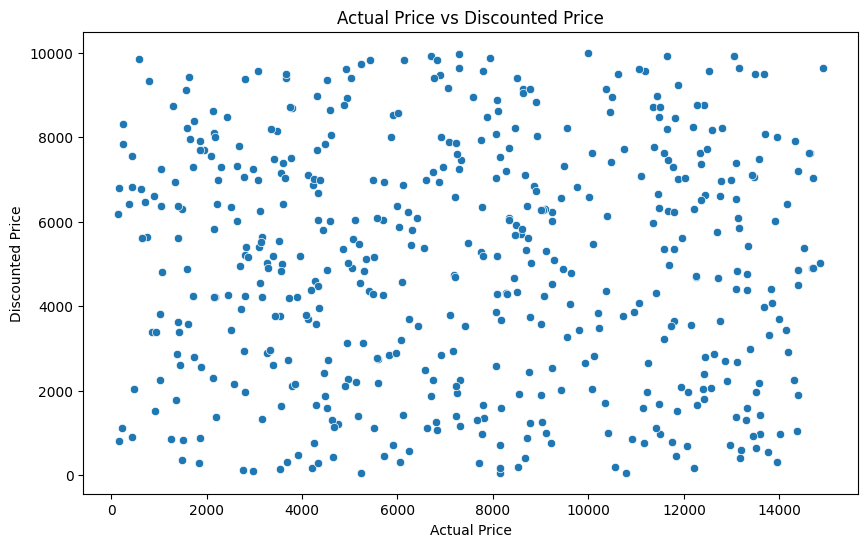

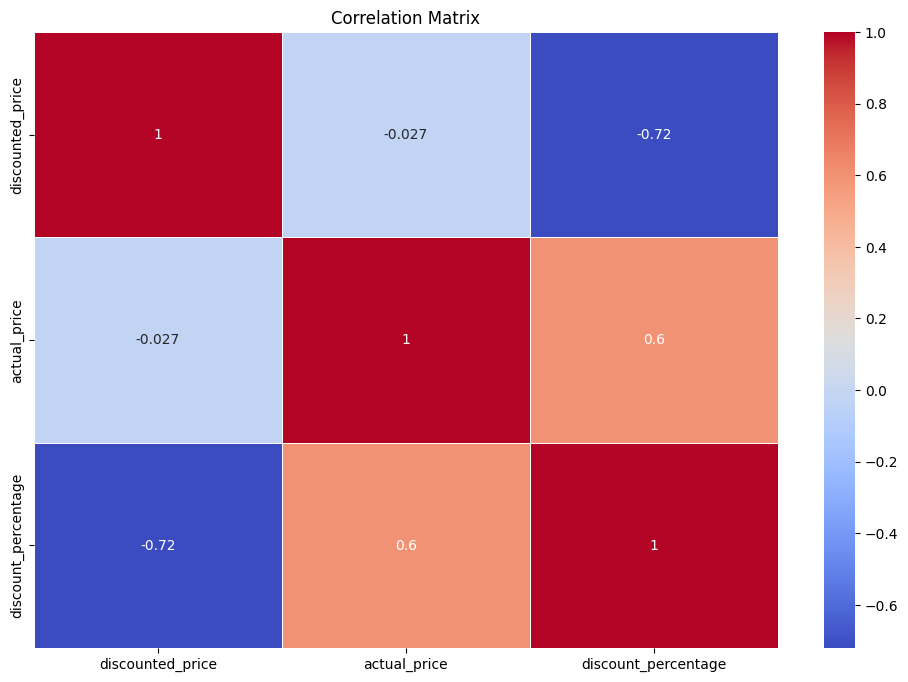

      category  discounted_price
0   Automotive       4862.340909
1       Beauty       5139.018182
2        Books       4362.571429
3     Clothing       5093.024390
4  Electronics       5486.854839
5    Furniture       4490.736842
6    Groceries       5023.102564
7   Home Decor       4996.666667
8       Sports       5499.509804
9         Toys       4916.083333


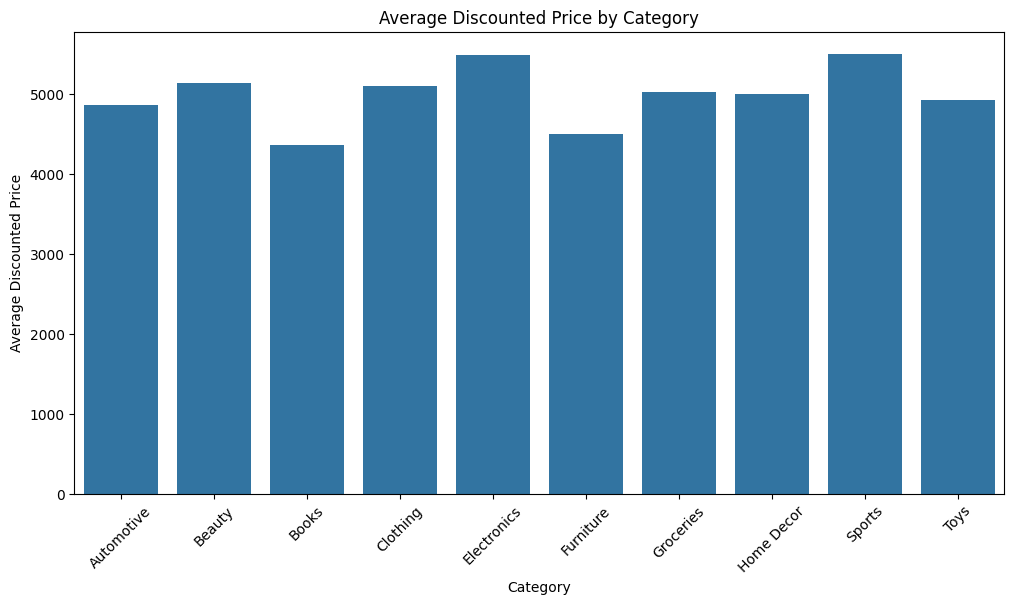

In [11]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['discounted_price'], kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='actual_price', y='discounted_price')
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = sales_data[['discounted_price', 'actual_price', 'discount_percentage']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify key patterns and anomalies
# Group by a categorical feature (example: 'category')
grouped_data = sales_data.groupby('category')['discounted_price'].mean().reset_index()
print(grouped_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='category', y='discounted_price')
plt.title('Average Discounted Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Discounted Price')
plt.xticks(rotation=45)
plt.show()


**Step 12:Save cleaned and preprocessed data for further analysis**

In [12]:
cleaned_file_path = 'cleaned_sales_data.csv'  # Replace with the desired save path
sales_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to cleaned_sales_data.csv
